# 2.2 & 2.3 Hacks

Here's an implementation of manipulating pixels in an image to produce red and purple scale versions (2.2):

---- meta data -----
Gsquare
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (400, 400)
-- original image --



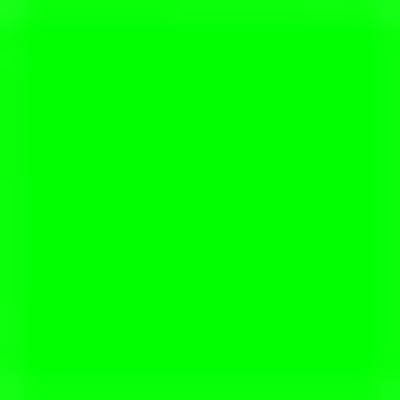

---- purple ----



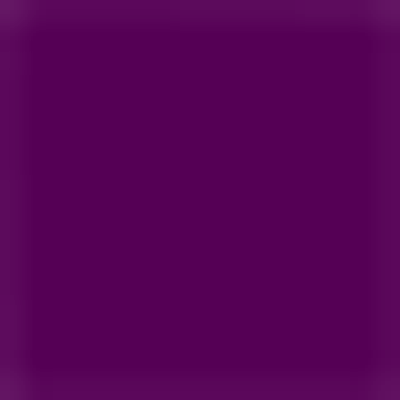

---- red image ----



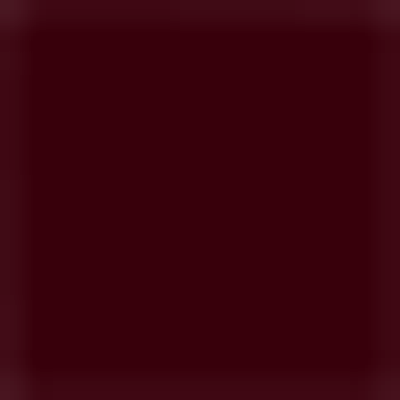

---- meta data -----
Cimpression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (400, 292)
-- original image --



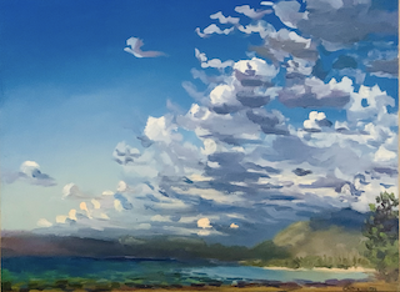

---- purple ----



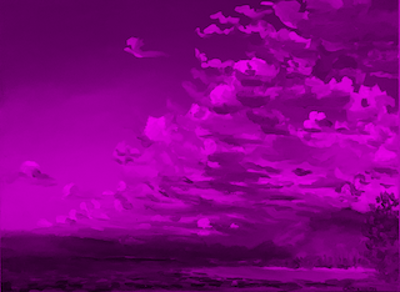

---- red image ----



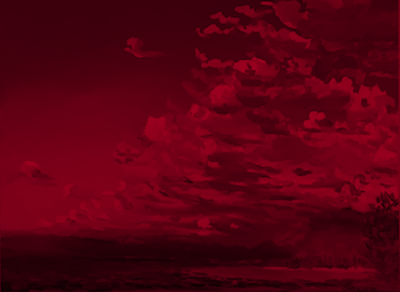

---- meta data -----
Lvolcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (400, 300)
-- original image --



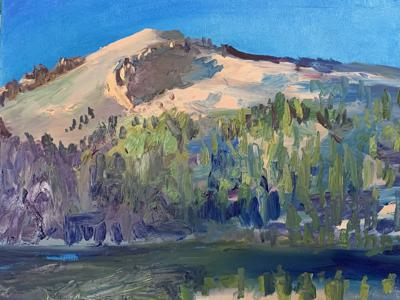

---- purple ----



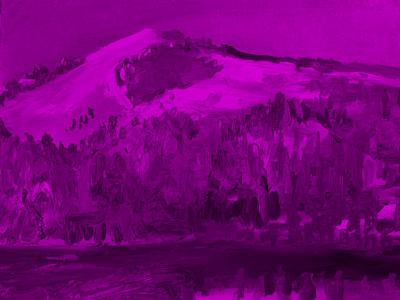

---- red image ----



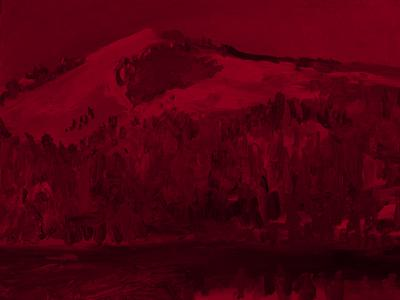

In [54]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Gsquare", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Cimpression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lvolcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    



    
# Create Grey Scale Base64 representation of Image
def image_management_add_html_red(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['red_data'] = [] # key/value for data converted to pink scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['red_data'].append((average, 0, average//5, pixel[3])) # PNG format
        else:
            image['red_data'].append((average, 0, average//5))
        # end for loop for pixels
        
    img.putdata(image['red_data'])
    image['html_red'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)


# Create Grey Scale Base64 representation of Image
def image_management_add_html_purple(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['purple_data'] = [] # key/value for data converted to pink scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['purple_data'].append((average, 0, average//1, pixel[3])) # PNG format
        else:
            image['purple_data'].append((average, 0, average//1))
        # end for loop for pixels
        
    img.putdata(image['purple_data'])
    image['html_purple'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("---- purple ----")
        image_management_add_html_purple(image)
        display(HTML(image['html_purple']))

        print("---- red image ----")
        image_management_add_html_red(image)
        display(HTML(image['html_red'])) 
    print()

# 2.3 Hacks

this code meets that criteria by filtering for NBA players and creating a new DataFrame with only NBA player data.

In [27]:
import pandas as pd

# Read in the CSV file as a DataFrame
player_data = pd.read_csv('/Users/josh/Downloads/archive/player_data.csv')

# Filter for rows where the 'position' column is 'G'
nba_data = player_data[player_data['position'] == 'C']

# Print the first 5 rows of the NBA guard data
print(nba_data.head())

                   name  year_start  year_end position height  weight  \
2   Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
21         Steven Adams        2014      2018        C    7-0   255.0   
32        Alexis Ajinca        2009      2017        C    7-2   248.0   
35        Solomon Alabi        2011      2012        C    7-1   251.0   
37          Gary Alcorn        1960      1961        C    6-9   225.0   

         birth_date                                college  
2    April 16, 1947  University of California, Los Angeles  
21    July 20, 1993               University of Pittsburgh  
32      May 6, 1988                                    NaN  
35   March 21, 1988               Florida State University  
37  October 8, 1936    California State University, Fresno  
